In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading data data
df= pd.read_csv(r"D:\AI\data\Bank_churn_modelling.csv")
df.shape

(10000, 14)

# Data Exploration

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
# unwanted columns - Rownumber, customerid, surname

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [7]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Data Cleaning

In [9]:
#remove the unwanted columns
print(df.shape)
df.drop(["RowNumber","CustomerId","Surname"],axis=1,inplace=True)
print(df.shape)

(10000, 14)
(10000, 11)


In [10]:
#check for missing values
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
#check for duplicates
df.duplicated().sum()

0

In [12]:
# check for outliers
df.skew()

CreditScore       -0.071607
Age                1.011320
Tenure             0.010991
Balance           -0.141109
NumOfProducts      0.745568
HasCrCard         -0.901812
IsActiveMember    -0.060437
EstimatedSalary    0.002085
Exited             1.471611
dtype: float64

# Feature Engineering

- Feature Extraction
- Feature Selection

## Feature Selection

### Using Data Visualization

In [13]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [14]:
numerics = ['CreditScore','Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary']
categorics = ['Geography', 'Gender','HasCrCard', 'IsActiveMember']

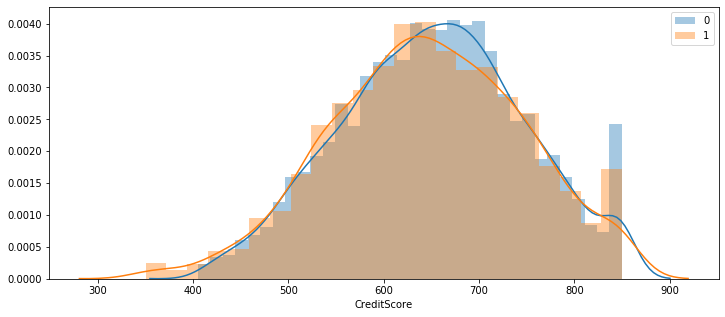

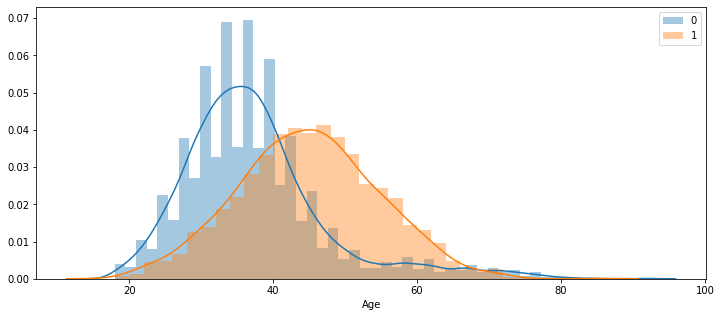

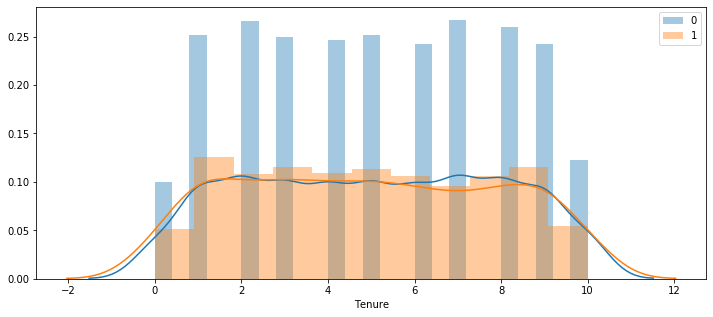

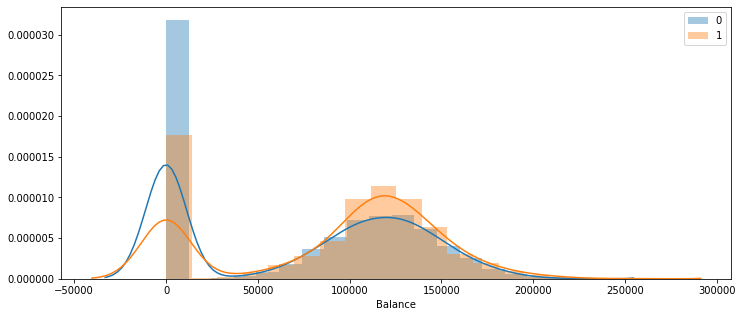

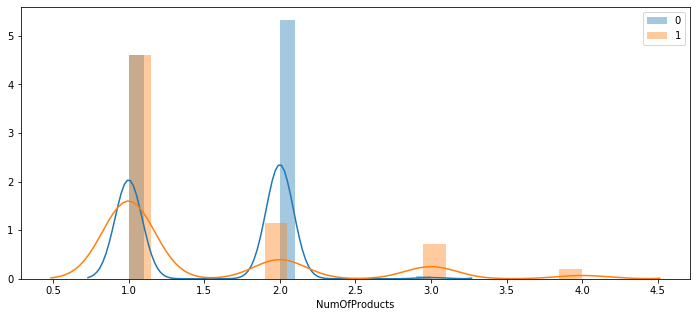

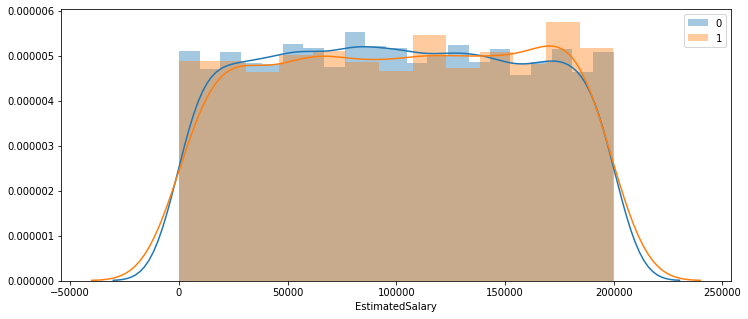

In [15]:
# Distplot for numeric v/s categorical(Exited)
for col in numerics:
    plt.figure(figsize=(12,5))
    sns.distplot(df[col][df.Exited==0])
    sns.distplot(df[col][df.Exited==1])
    plt.legend(['0','1'])
    plt.show()

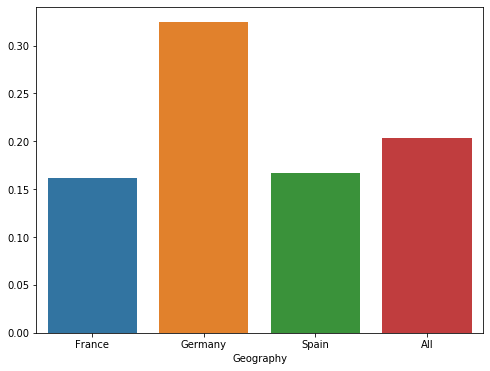

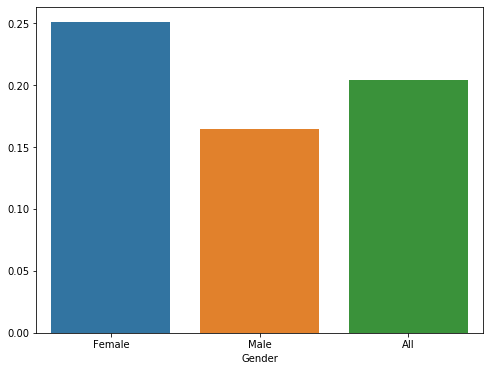

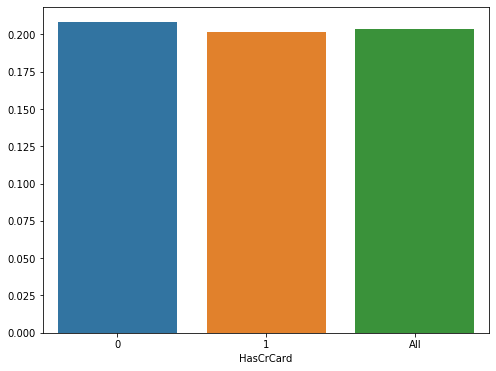

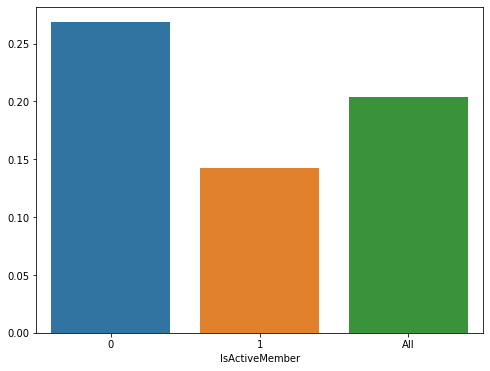

In [16]:
# for categorical features

for col in categorics:
    table = pd.crosstab(df[col],df["Exited"],margins=True)
    dropout_rate = table[1]/table["All"]
    plt.figure(figsize=(8,6))
    sns.barplot(dropout_rate.index,dropout_rate.values)
    plt.show()

In [17]:
table = pd.crosstab(df.Geography,df.Exited,margins=True)
table

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


In [18]:
table[1]/table["All"]

Geography
France     0.161548
Germany    0.324432
Spain      0.166734
All        0.203700
dtype: float64

In [19]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Important features - Geography, Gender, Age, Balance, Numofproducts, IsActiveMember

### Using statistics

#### Correlation Analysis

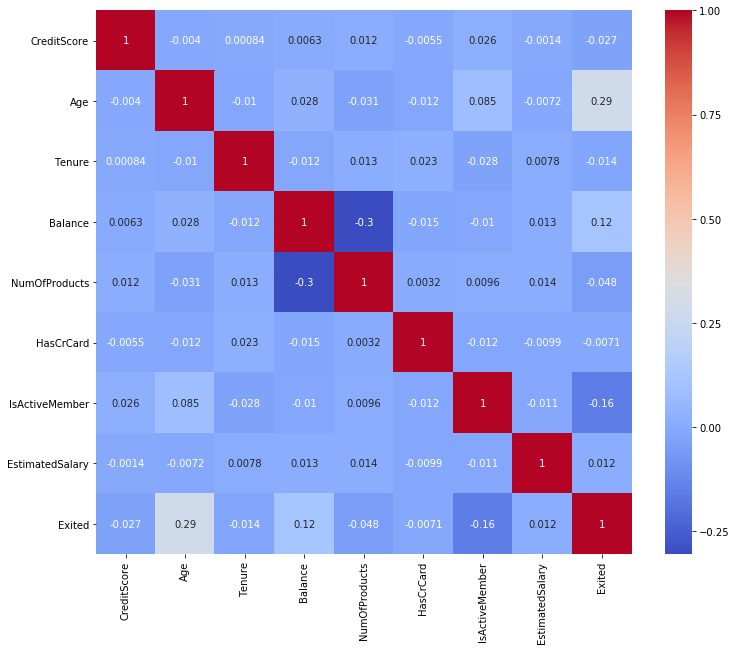

In [20]:
cor = df.corr()
plt.figure(figsize=(12,10))
ax = sns.heatmap(cor,annot=True,cmap="coolwarm")
top,bot = ax.get_ylim()
ax.set_ylim(top+0.5,bot-0.5)
plt.show()

important features - Age, Balance, Numofproducts

### ANOVA
ANOVA = Analysis of variance – compare means / variation in two or more samples 

Sample1 – an array having data of age of customers who left the bank 

Sample2 – an array having data of age of customers who didn't leave the bank 
*************************************************************
 

 

**For ANOVA -**  

Null Hypothesis – H0 = means of two samples are similar to each other 

Alternate Hypothesis – Ha = means of two samples are different than each other 

 

 

- If the business confidence is = 95% = 0.95 

- Significance level = 5% = 0.05 

 ******************************

 

If pvalue > 0.05 = we accept the H0 (Null Hypothesis) = feature is not important  

If pvalue <0.05 = we reject the H0 (Null Hypothesis) = feature is important 

In [21]:
xnum = df[numerics]
y = df['Exited']

from sklearn.feature_selection import f_classif
fval,pval = f_classif(xnum,y)
for i in range(len(xnum.columns)): print(numerics[i]," ",pval[i])

CreditScore   0.006738213892258643
Age   1.2399313093415039e-186
Tenure   0.1615268494952801
Balance   1.275563319153163e-32
NumOfProducts   1.7173330048040421e-06
EstimatedSalary   0.22644042802376574


#### Chi Square Test 
Chi Square Test - comparision of distribution of categories among multiple groups

Sample1 – distribution of geography for customers who left

Sample2 – distrbution of geography for customers who didn't leave
*************************************************************
 

 

**For Chiq Square -**  

Null Hypothesis – H0 = two groups have similar distribution 

Alternate Hypothesis – Ha = two groups have different distribution.
 

 

- If the business confidence is = 95% = 0.95 

- Significance level = 5% = 0.05 

 ******************************

 

If pvalue > 0.05 = we accept the H0 (Null Hypothesis) = feature is not important  

If pvalue <0.05 = we reject the H0 (Null Hypothesis) = feature is important 

In [22]:
xcat = df[categorics]
from sklearn.preprocessing import LabelEncoder
xcat.Geography = LabelEncoder().fit_transform(xcat.Geography)
xcat.Gender = LabelEncoder().fit_transform(xcat.Gender)

from sklearn.feature_selection import chi2
cval,pval = chi2(xcat,y)
for i in range(len(categorics)): print(categorics[i]," ",pval[i])

Geography   0.0005756078382573235
Gender   7.015574513879596e-13
HasCrCard   0.6984962089530451
IsActiveMember   1.5680362405434552e-27


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


important features - Creditscore, Age, Balance, Numofproducts, Geography, Gender, IsActiveMember

In [23]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [24]:
x = df[['CreditScore', 'Geography', 'Gender', 'Age','Balance',
       'NumOfProducts', 'IsActiveMember']]
y = df["Exited"]

# Preprocessing

In [25]:
x.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,Female,42,0.00,1,1
1,608,Spain,Female,41,83807.86,1,1
2,502,France,Female,42,159660.80,3,0
3,699,France,Female,39,0.00,2,0
4,850,Spain,Female,43,125510.82,1,1


#### Encoding of Geography and Gender

In [26]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

In [27]:
# for Gender
le1 = LabelEncoder()
le1.fit(x.Gender)
print(le1.classes_)

['Female' 'Male']


In [28]:
# encoding of gender
x.Gender = le1.transform(x.Gender)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [30]:
from sklearn.preprocessing import StandardScaler
# Onehot encoding for geography
encoder = ColumnTransformer([("ohe",OneHotEncoder(),[1]),
                             ("sc",StandardScaler(),[0,3,4,5]) ],remainder='passthrough')
encoder.fit(x)
x2 = encoder.transform(x)
x2.shape

(10000, 9)

In [31]:
x2 = pd.DataFrame(x2)
x2.head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,-0.326221,0.293517,-1.225848,-0.911583,0.0,1.0
1,0.0,0.0,1.0,-0.440036,0.198164,0.117350,-0.911583,0.0,1.0
2,1.0,0.0,0.0,-1.536794,0.293517,1.333053,2.527057,0.0,0.0
3,1.0,0.0,0.0,0.501521,0.007457,-1.225848,0.807737,0.0,0.0
4,0.0,0.0,1.0,2.063884,0.388871,0.785728,-0.911583,0.0,1.0


In [32]:
x.head(6)

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember
0,619,France,0,42,0.00,1,1
1,608,Spain,0,41,83807.86,1,1
2,502,France,0,42,159660.80,3,0
3,699,France,0,39,0.00,2,0
4,850,Spain,0,43,125510.82,1,1
5,645,Spain,1,44,113755.78,2,0


In [33]:
df.head(6)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1


##### splitting data into train and test set

In [34]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.2,random_state=5)
print(x2.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(10000, 9)
(8000, 9)
(2000, 9)
(10000,)
(8000,)
(2000,)


## Apply Machine Learning - Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [36]:
#train the model using training data
model.fit(xtrain,ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

# Performance Analysis

In [37]:
new_customer = [[650,"Germany",1,51,456125,3,1]]
new_customer = encoder.transform(new_customer)

In [38]:
model.predict(new_customer)

array([0], dtype=int64)

In [39]:
# we will assess the performance of model using test data - xtest and ytest
ypred = model.predict(xtest)
from sklearn import metrics
metrics.accuracy_score(ytest,ypred)

0.8095

In [40]:
metrics.recall_score(ytest,ypred)

0.19012345679012346

<img src = "images/classification_2.png">

In [41]:
metrics.confusion_matrix(ytest,ypred)

array([[1542,   53],
       [ 328,   77]], dtype=int64)

In [42]:
metrics.f1_score(ytest,ypred)

0.28785046728971964

# Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(criterion="gini")

In [44]:
# train the model using train data - xtrain, ytrain
model2.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [46]:
ypred2 = model2.predict(xtest)
metrics.accuracy_score(ytest,ypred2)

0.782

In [47]:
metrics.recall_score(ytest,ypred2)

0.5061728395061729

## visualizing the tree


In [48]:
from sklearn.preprocessing import StandardScaler
# Onehot encoding for geography
encoder = ColumnTransformer([("ohe",OneHotEncoder(),[1]) ],remainder='passthrough')
encoder.fit(x)
x2 = encoder.transform(x)
x2.shape

(10000, 9)

In [52]:
pd.DataFrame(x2).head()

,0,1,2,3,4,5,6,7,8
0,1.0,0.0,0.0,619.0,0.0,42.0,0.00,1.0,1.0
1,0.0,0.0,1.0,608.0,0.0,41.0,83807.86,1.0,1.0
2,1.0,0.0,0.0,502.0,0.0,42.0,159660.80,3.0,0.0
3,1.0,0.0,0.0,699.0,0.0,39.0,0.00,2.0,0.0
4,0.0,0.0,1.0,850.0,0.0,43.0,125510.82,1.0,1.0


In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x2,y,test_size=0.2,random_state=5)
print(x2.shape)
print(xtrain.shape)
print(xtest.shape)
print(y.shape)
print(ytrain.shape)
print(ytest.shape)

(10000, 9)
(8000, 9)
(2000, 9)
(10000,)
(8000,)
(2000,)


In [51]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [54]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier(criterion="entropy",max_depth=8,max_leaf_nodes=30)
# train the model using train data - xtrain, ytrain
model3.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=8,
                       max_features=None, max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

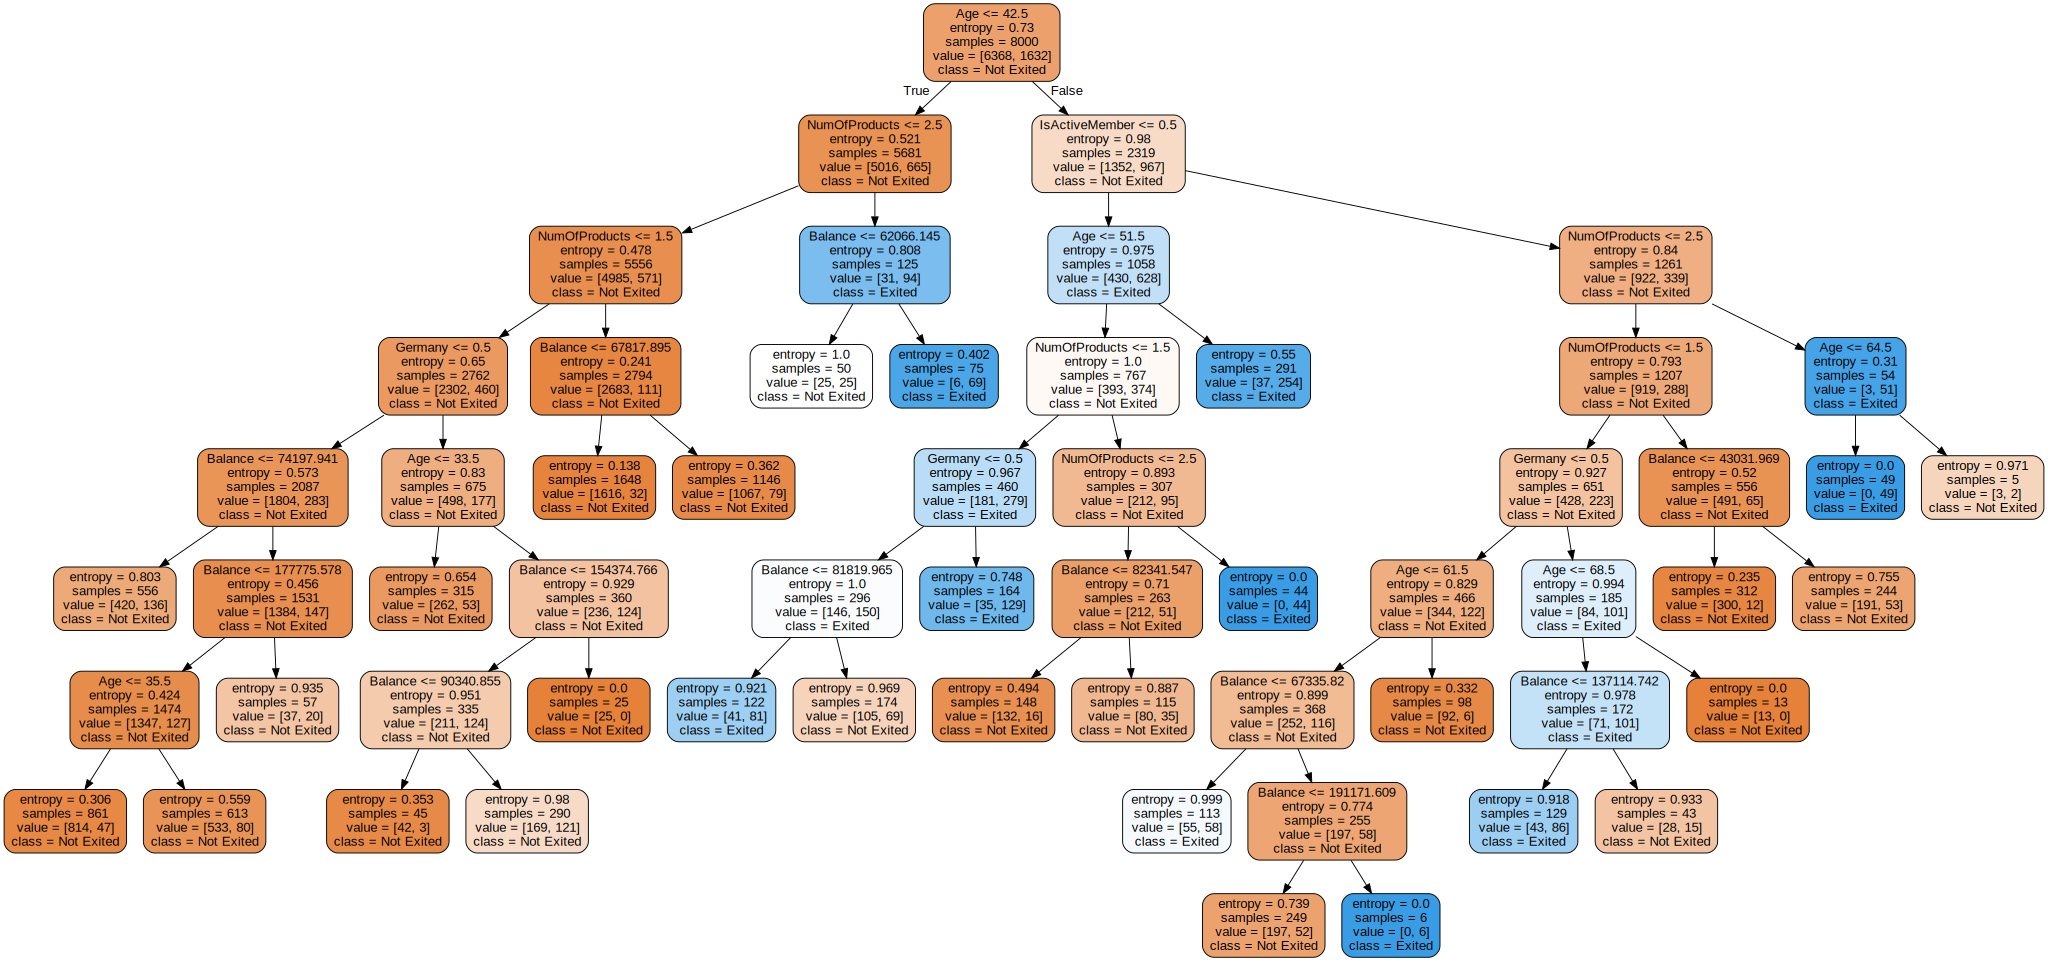

In [55]:
# pip install graphviz
import graphviz
from sklearn import tree
features_names = ["France","Germany","Spain",'CreditScore','Gender','Age','Balance',
       'NumOfProducts','IsActiveMember']
class_names = ['Not Exited','Exited']
graph_data = tree.export_graphviz(model3,feature_names=features_names,class_names=class_names,
                                 rounded=True, filled=True)
graph = graphviz.Source(graph_data)
graph

In [58]:
# feature importance - can be used for feature selection
model3.feature_importances_

array([0.        , 0.04896237, 0.        , 0.        , 0.        ,
       0.39736761, 0.12855251, 0.33453138, 0.09058612])

In [60]:
for i in range(len(features_names)): print(features_names[i],model3.feature_importances_[i])

France 0.0
Germany 0.04896237277119826
Spain 0.0
CreditScore 0.0
Gender 0.0
Age 0.3973676136731552
Balance 0.12855250832819834
NumOfProducts 0.3345313828739313
IsActiveMember 0.09058612235351693
